In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import ttest_ind, norm, chi2_contingency
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from sklearn.linear_model import LinearRegression


# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

CARGO LOS ARCHIVOS Y LOS CONVIERTO A DATAFRAME (LOS DOS)

In [2]:
df_vuelos = pd.read_csv("./Customer Flight Activity.csv", index_col = 0)
df_loyalty = pd.read_csv("./Customer Loyalty History.csv", index_col = 0)

BUSCO LOS DATOS GENERALES DEL DATAFRAME 

In [3]:
df_loyalty.shape

(16737, 15)

In [4]:
df_vuelos.shape

(405624, 9)

In [5]:
df_vuelos.sample(2)

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
432920,2018,5,0,0,0,0,0.0,0,0
227293,2017,10,1,1,2,2650,265.0,415,34


In [6]:
df_loyalty.sample(2)

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
356812,Canada,British Columbia,Vancouver,V6E 3Z3,Male,College,NaN,Single,Nova,6763.18,Standard,2013,5,NaN,NaN
933807,Canada,Ontario,Toronto,P1W 1K4,Male,Bachelor,80398.0,Married,Aurora,8986.61,Standard,2017,11,NaN,NaN


VOY A UNIR LOS DOS DATAFRAME CON UN MERGE POR QUE TIENEN UNA COLUMNA EN COMUN 

In [7]:
df_unido_merge = pd.merge(df_loyalty,df_vuelos, on='Loyalty Number', how= 'inner' )
df_unido_merge


,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.0,465,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,8,0,0,0,0,0.0,0,0
652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,9,0,0,0,0,0.0,0,0
652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,10,0,0,0,0,0.0,0,0


In [8]:
df_unido_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405624 entries, 480934 to 652627
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      405624 non-null  object 
 1   Province                     405624 non-null  object 
 2   City                         405624 non-null  object 
 3   Postal Code                  405624 non-null  object 
 4   Gender                       405624 non-null  object 
 5   Education                    405624 non-null  object 
 6   Salary                       302952 non-null  float64
 7   Marital Status               405624 non-null  object 
 8   Loyalty Card                 405624 non-null  object 
 9   CLV                          405624 non-null  float64
 10  Enrollment Type              405624 non-null  object 
 11  Enrollment Year              405624 non-null  int64  
 12  Enrollment Month             405624 non-null  int64  

BUSCAMOS NULOS

In [9]:
df_unido_merge.isnull().sum()

Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              355560
Cancellation Month             355560
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
dtype: int64

In [10]:
# vamos a ver que columnas tienen valores nulos en porcentaje
df_unido_merge.isnull().sum()[df_unido_merge.isnull().sum() > 0] / df_unido_merge.shape[0]*100

Salary                25.312112
Cancellation Year     87.657535
Cancellation Month    87.657535
dtype: float64

BUSCAMOS LOS DUPLICADOS

In [11]:
df_unido_merge.duplicated().sum()

1864

SACAMOS LOS ESTADISTICOS DE NUESTRAS COLUMNAS, SEPARADAS POR CATEGORICAS O NUMERICAS

In [12]:
# principales estadisticos de todas las columnas
print("columnas numericas son :")
display(df_unido_merge.describe().T)
print(".............")
print("columnas categoricas son :")
display(df_unido_merge.describe(include = "O").T)

columnas numericas son :


,count,mean,std,min,25%,50%,75%,max
Salary,302952.0,79268.825953,34992.133508,-58486.00,59262.00,73479.00,88612.00,407228.00
CLV,405624.0,7991.976226,6863.663857,1898.01,3985.32,5776.34,8936.82,83325.38
Enrollment Year,405624.0,2015.252529,1.979427,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,405624.0,6.668008,3.399766,1.00,4.00,7.00,10.00,12.00
Cancellation Year,50064.0,2016.499521,1.384336,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,50064.0,6.966443,3.448300,1.00,4.00,7.00,10.00,12.00
Year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.0,6.500000,3.452057,1.00,3.75,6.50,9.25,12.00
Flights Booked,405624.0,4.115052,5.225518,0.00,0.00,1.00,8.00,21.00
Flights with Companions,405624.0,1.031805,2.076869,0.00,0.00,0.00,1.00,11.00


.............
columnas categoricas son :


,count,unique,top,freq
Country,405624,1,Canada,405624
Province,405624,11,Ontario,130896
City,405624,29,Toronto,81096
Postal Code,405624,55,V6E 3D9,21984
Gender,405624,2,Female,203640
Education,405624,5,Bachelor,253752
Marital Status,405624,3,Married,235800
Loyalty Card,405624,3,Star,184224
Enrollment Type,405624,2,Standard,382200


In [13]:
df_unido_merge.sample(3)

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
690191,Canada,British Columbia,Vancouver,V6E 3Z3,Male,Bachelor,47322.0,Married,Nova,10594.13,2018 Promotion,2018,4,NaN,NaN,2017,12,5,0,5,3665,366.0,0,0
465260,Canada,British Columbia,Vancouver,V6E 3Z3,Female,Bachelor,89817.0,Married,Aurora,5977.79,Standard,2012,11,NaN,NaN,2018,8,0,0,0,0,0.0,0,0
137985,Canada,British Columbia,Whistler,V6T 1Y8,Male,College,NaN,Single,Star,5886.62,Standard,2015,4,NaN,NaN,2018,10,4,4,8,2928,292.0,0,0


## gestion de nulos para la columna de salario 
- la voy a gestionar con la mediana de la columna, pues la columna es de salario y con esta opcion no se vera afectada por valores atipicos

In [14]:
salario_mediana = df_unido_merge['Salary'].median()
df_unido_merge['Salary'].fillna(salario_mediana, inplace=True)

In [15]:
# vamos a ver que columnas tienen valores nulos en porcentaje
df_unido_merge.isnull().sum()[df_unido_merge.isnull().sum() > 0] / df_unido_merge.shape[0]*100

Cancellation Year     87.657535
Cancellation Month    87.657535
dtype: float64

Las siguientes dos columnas las vamos aelimnar ya que tienen un porcentaje de nulos altisimo 

In [16]:
df_unido_merge.drop(["Cancellation Year", "Cancellation Month"], axis=1, inplace= True)



In [31]:



# Diccionario para mapear números de mes a nombres de mes
meses_dict = {
    1: 'enero',
    2: 'febrero',
    3: 'marzo',
    4: 'abril',
    5: 'mayo',
    6: 'junio',
    7: 'julio',
    8: 'agosto',
    9: 'septiembre',
    10: 'octubre',
    11: 'noviembre',
    12: 'diciembre'
}

# Aplicar la transformación a la columna "month"
df_unido_merge['Month'] = df_unido_merge['Month'].map(meses_dict)

# Mostrar el DataFrame resultante
df_unido_merge.sample(3)

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,
184090,Canada,British Columbia,Kelowna,V09 2E9,Male,Master,108324.0,Married,Star,2691.38,Standard,2017,8,2018,NaN,11,0,11,935,93.0,0,0
498610,Canada,British Columbia,Vancouver,V5R 1W3,Female,College,73479.0,Married,Star,2563.86,Standard,2017,9,2018,NaN,3,0,3,3585,358.0,0,0
300371,Canada,British Columbia,Vancouver,V6E 3D9,Female,Bachelor,74099.0,Divorced,Aurora,30909.22,Standard,2014,11,2017,NaN,11,0,11,2651,265.0,0,0


In [26]:
df_unido_merge.columns

Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

# VISUALIZACION

Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [30]:
df_unido_merge['Month'].value_counts()

enero         33802
febrero       33802
marzo         33802
abril         33802
octubre       33802
mayo          33802
junio         33802
julio         33802
agosto        33802
septiembre    33802
noviembre     33802
diciembre     33802
Name: Month, dtype: int64

In [ ]:
# Voy agrupar los vuelos reservados por mes y contar cuántos hay por mes
reservas_por_mes = df_unido_merge['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
reservas_por_mes.plot(kind='line', marker='o', color='green')
plt.title('Distribución de vuelos reservados por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos reservados')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

 ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

In [32]:
# Calcular la correlación entre la distancia de los vuelos y los puntos acumulados por los clientes lo hare con el coeficiente de correlación de Pearson, 
#que es una medida de la relación lineal entre dos variables continuas.

correlacion = df_unido_merge['Distance'].corr(df_unido_merge['Points Accumulated'])

# Mostrar la correlación
print("Correlación entre la distancia de los vuelos y los puntos acumulados:", correlacion)

Correlación entre la distancia de los vuelos y los puntos acumulados: 0.9945637211531313


el valor es cercano a 1 lo que indica una correlacion positiva fuerte (cuando una variable sube la otra tambien)

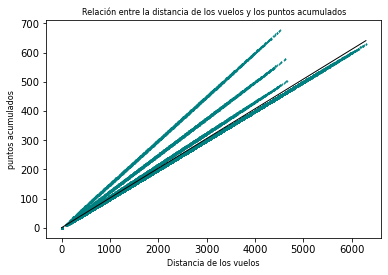

In [38]:
sns.regplot(x = "Distance", 
            y = "Points Accumulated", 
            data = df_unido_merge, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 1} # cambiamos el color y el tamaño de los puntos del scaterplot
            )

# cambiamos los nombres de los ejes como hemos estado haciendo hasta ahora
plt.xlabel("Distancia de los vuelos", fontsize = 8)
plt.ylabel("puntos acumulados", fontsize = 8)

# ponemos título a la gráfica
plt.title("Relación entre la distancia de los vuelos y los puntos acumulados", fontsize = 8);

3. ¿Cuál es la distribución de los clientes por provincia o estado?

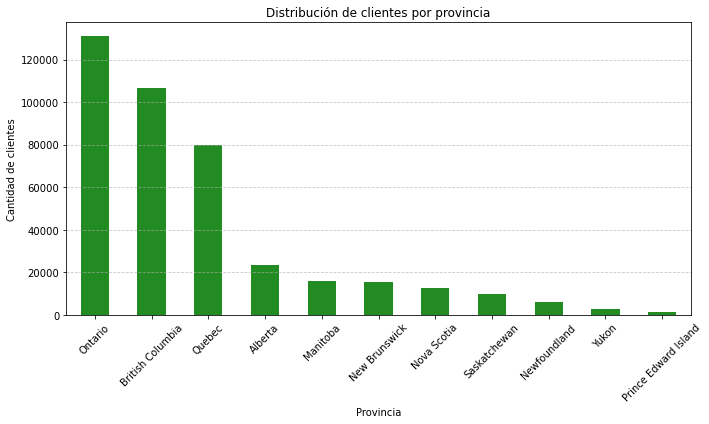

In [37]:
# Calcular el recuento de clientes por provincia o estado
clientes_por_provincia = df_unido_merge['Province'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
clientes_por_provincia.plot(kind='bar', color='forestgreen')
plt.title('Distribución de clientes por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [39]:
df_unido_merge['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [40]:
#Agrupar el salario promedio por nivel educativo
salario_promedio_por_educacion = df_unido_merge.groupby('Education')['Salary'].mean().sort_values()
salario_promedio_por_educacion

Education
High School or Below     60986.544192
Bachelor                 72476.211860
College                  73479.000000
Master                  103767.494163
Doctor                  178335.439516
Name: Salary, dtype: float64

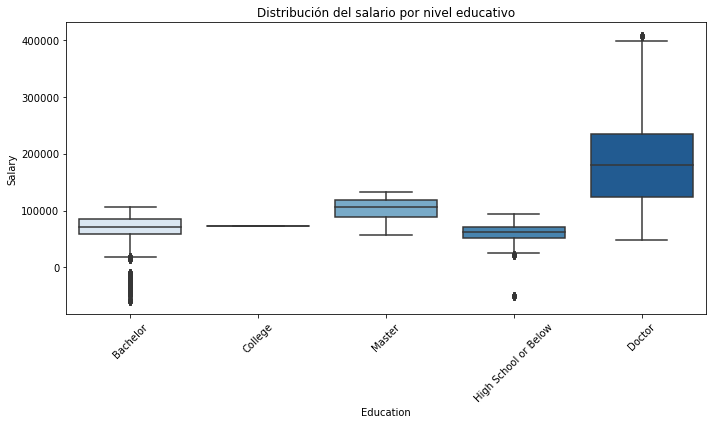

In [41]:
# Crear el gráfico de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Salary', data=df_unido_merge, palette='Blues')
plt.title('Distribución del salario por nivel educativo')
plt.xlabel('Education')
plt.ylabel('Salary')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()
plt.show()

In [43]:
df_unido_merge.head(1)

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2017,NaN,0,0,0,0,0.0,0,0


 ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [45]:
# Contar el número de clientes por tipo de tarjeta de fidelidad
clientes_por_tarjeta = df_unido_merge['Loyalty Card'].value_counts()
clientes_por_tarjeta


Star      184224
Nova      137568
Aurora     83832
Name: Loyalty Card, dtype: int64

In [48]:

# Calcular la proporción de clientes para cada tipo de tarjeta de fidelidad
proporcion_clientes_por_tarjeta = clientes_por_tarjeta / len(df_unido_merge)* 100
proporcion_clientes_por_tarjeta

Star      45.417431
Nova      33.915153
Aurora    20.667416
Name: Loyalty Card, dtype: float64

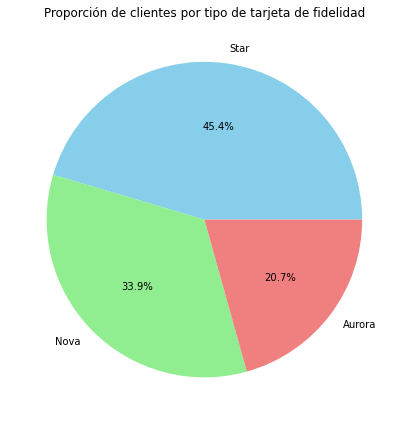

In [49]:
# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
proporcion_clientes_por_tarjeta.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Proporción de clientes por tipo de tarjeta de fidelidad')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
# empezamos preparando los datos para poder hacer el pieplot usando un groupby. En este caso tendremos que contar el número de clientes que tenemos por tarjeta
df_tarjeta = df_unido_merge.groupby('Loyalty Card')['Loyalty Number'].count().reset_index()
df_tarjeta

In [50]:
# lo primero que vamos a hacer es definir una lista para definir los colores que queremos para cada una de las categorías. 
# Esta lista debe tener tantos elementos como categorías tenemos en la columna de estudio (en este caso 7)
colores = ["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]


# creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior
plt.pie("Loyalty Number", labels= "Loyalty Card",
        data = proporcion_clientes_por_tarjeta, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90);

TypeError: pie() missing 1 required positional argument: 'x'

6. ¿Cómo se distribuyen los clientes según su estado civil y género?